# Introduction to Data Science
## Text Mining 

Sophia Maria Tsilerides

***

We will be analyzing a data set of movie ratings from IMDB.com. To begin, let's look at the Naive Bayes classifer to get a better understanding of the algorithms we will be using later. 
### Naive Bayes

The naive Bayes classifier works by calculating the conditional probabilities of each feature occuring within each class and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence:

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

and the conditional probability of each piece of evidence occuring with a given class is given by:

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

The problem with Naivee Bayes is that if a particular attribute value does not occur in the training data set, the results may be misleading. A common variation of the above is to use Laplace (sometimes called +1) smoothing. 

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

We add a Laplace Estimator to the attributes when calculating probabilities so that any value that occurs zero times will be replaced by a non-zero number. This prevents the possibility of getting 0 or 1 for a probability. To do this, we add a value to the numerator and the denominator for every category. In terms of the bias-variance tradeoff, if the Laplace Estimator is 0 (so we don't have a Laplace estimator) our model is overfitting and there is high variance because for a very small change in the training data there is very different model. If a large value is used as a Laplace Estimator, the influence of observed counts will be lower because estimated probabilities for the same number of observations will be lower. Thus, variance in the model is lower but there is larger bias. 

A case when using a Laplace estimator can lead to better results is in spam filtering with two classes: "Ham" or "Spam." Let's also assume the probability of spam or ham is 50/50. If we get an email that our classifier rates as P(Ham|words in email) = .90 and P(Spam|words in email) = .10 we can say that the email is probably not spam. However, if we get another email that's almost identical to the first but with 1 extra word, the word's count is 0. Thus, we'd get P(Ham|words in email + 1 extra word) = P(Spam|words in email + 1 extra word) = 0. Therefore, despite the first email being strongly classified as Ham, the second email with just a one word difference has a probability of being Ham equal to zero without a Laplace Estimator to smooth out the probabilities.


### Text classification for sentiment analysis 
The data we will be looking at consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

directory = os.getcwd()
data = pd.read_csv(directory + '/imdb.csv', sep=',') 
data = pd.DataFrame(data)
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


In [2]:
data['Class'][data['Class'] == 'P'] = 1 
data['Class'][data['Class'] == 'N'] = 0

In [3]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X.head()

0    'One of the first of the best musicals Anchors...
1    'Visually disjointed and full of itself the di...
2    'These type of movies about young teenagers st...
3    'I would rather of had my eyes gouged out with...
4    'The title says it all. Tail Gunner Joe was a ...
Name: Text, dtype: object

Let's check for missing values.

In [5]:
X[X.isna() == True]

Series([], Name: Text, dtype: object)

In [6]:
Y[Y.isna() == True]

3544    NaN
Name: Class, dtype: object

We have to replace the missing value in the Y series otherwise our models won't train. 

In [7]:
X.iloc[3544] 
#this doesn't seem like a full review.

"'TIGERLAND / (2000) ***1/2 (out of four) By Blake French: "

After some research on the IMDb, I found that this is not the full review. So, the row has been modified and the corresponding Y is 1 for positive review. 

<img src="Review.png" alt="can also be found https://www.imdb.com/review/rw0594730/?ref_=tt_urv" />

In [8]:
X.iloc[3544] = """TIGERLAND / (2000) ***1/2 (out of four) By Blake French:
Throughout the years audiences have seen and understood war films with every point of view possible, and somehow producers and writers always come up with new and innovative methods of portraying various soldiers on the battlefield. Joel Schumacher ("8MM," "A Time to Kill"), easily one of the riskiest directors currently working, has found resemblance with "The Thin Red Line" in the way his new drama "Tigerland" steps in an individual soldier's shoes. This movie, written by Ross Klavan and Michael McGuther, has more guts and irony than "The Thin Red Line" or even "Saving Private Ryan." Although the movie's dramatic impact is somewhat lessened due to the perversity of the material present, it certainly enlightens us on a new perspective of young men training for war. 
I would want to know Joel Schumacher's experiences with the army. Are the men really this unabashed and brutal? I am sure some of them are, but the movie views its uncompromising world through the eyes of a young man named Roland Bozz (Colin Farrell), who is rebellious against the ideas of war. His personality instantly counteracts with several other characters, one who becomes his best friend, Paxton (Matthew Davis), and another, Wilson (Russell Richardson), whose flamed temper often exasperates Bozz's tension with the idea of going to war. The war depicted in this production is not found on a battlefield, but on training grounds of a Louisiana-based instruction camp between conceptions and fears of the soldiers in training. This film is specifically about the preparation for war, nothing more nothing less. It ends when the soldiers finally go to war, kind of disappointing since witnessing the characters in action would have served as a supurb payoff. 
Shot on location in about 28 days using 16mm stock and a minuscule budget, Joel Schumacher accurately displays a gritty, perverse, cruel, and unmerciful atmosphere using hand-held cinematography, unique lighting techniques and direct sound. Schumacher's grainy and blown-out images make the movie feel like a documentary feature. This unusual style of filmmaking only contributes to the hard core realism of the movie, quite graphic in its use of coarse language, perhaps a little too disturbing. Waves of four-letter words pound the audience, some in shock of what they are hearing. Even the extreme amount of vulgarism does not keep the dialogue from prevailing as heartbreaking, true, and emotional.
If anything, "Tigerland" provides us with a minor appreciation of how much our soldiers go through for our country in the beginning stages of combat. Such bravery must it take to enlist in the army during times of war, knowing the hardships and risks that are being taken. Such thought-provoking ideas are made possible through the heartbreaking performances by the young aspiring actors who portray the various trainees. This movie is not for all audiences, but one that young men should take a look at before enlisting themselves in the army...and adult audiences should watch to appreciate the courage needed to do such." """

In [9]:
X.iloc[3544]

'TIGERLAND / (2000) ***1/2 (out of four) By Blake French:\nThroughout the years audiences have seen and understood war films with every point of view possible, and somehow producers and writers always come up with new and innovative methods of portraying various soldiers on the battlefield. Joel Schumacher ("8MM," "A Time to Kill"), easily one of the riskiest directors currently working, has found resemblance with "The Thin Red Line" in the way his new drama "Tigerland" steps in an individual soldier\'s shoes. This movie, written by Ross Klavan and Michael McGuther, has more guts and irony than "The Thin Red Line" or even "Saving Private Ryan." Although the movie\'s dramatic impact is somewhat lessened due to the perversity of the material present, it certainly enlightens us on a new perspective of young men training for war. \nI would want to know Joel Schumacher\'s experiences with the army. Are the men really this unabashed and brutal? I am sure some of them are, but the movie views

In [10]:
Y.iloc[3544] = 1

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
Y = Y.astype('int')

We now create a binary `CountVectorizer()` and a binary `TfidfVectorizer()` using the original single words as well as bigrams in the same model as well as an "english" stop word list. We then fit these to the training data to extract a vocabulary and then transform both the train and test data. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [13]:
#CountVectorizer
binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
binary_vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
list(binary_vectorizer.vocabulary_.keys())[0:10]
binary_vectorizer.get_feature_names()[0:10]

['00',
 '00 cashfor',
 '00 certainly',
 '00 cost',
 '00 dollars',
 '00 hilarious',
 '00 just',
 '00 known',
 '00 late',
 '00 like']

In [15]:
#stores data in sparse matrix
X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

In [16]:
#TfidfVectorizer
binary_Tfidf_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
binary_Tfidf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [17]:
list(binary_Tfidf_vectorizer.vocabulary_.keys())[0:10]
binary_Tfidf_vectorizer.get_feature_names()[0:10]

['00',
 '00 cashfor',
 '00 certainly',
 '00 cost',
 '00 dollars',
 '00 hilarious',
 '00 just',
 '00 known',
 '00 late',
 '00 like']

In [18]:
#stores data in sparse matrix
X_train_binary_Tfidf = binary_Tfidf_vectorizer.transform(X_train)
X_test_binary_Tfidf = binary_Tfidf_vectorizer.transform(X_test)

Next, let's create `LogisticRegression()` and `BernoulliNB()` models. For all settings we keep the default values. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc

In [20]:
#L O G I S T I C  R E G R E S S I O N 
#CountVectorizer
countvec_LR_model = LogisticRegression()
countvec_LR_model.fit(X_train_binary, Y_train)
countvec_LR_fpr, countvec_LR_tpr, countvec_LR_thresholds = roc_curve(Y_test, countvec_LR_model.predict_proba(X_test_binary)[:,1])
countvec_LR_auc = auc(countvec_LR_fpr, countvec_LR_tpr)

#TfidfVectorizer
Tfidf_LR_model = LogisticRegression()
Tfidf_LR_model.fit(X_train_binary_Tfidf, Y_train)
Tfidf_LR_fpr, Tfidf_LR_tpr, Tfidf_LR_thresholds = roc_curve(Y_test, Tfidf_LR_model.predict_proba(X_test_binary_Tfidf)[:,1])
Tfidf_LR_auc = auc(Tfidf_LR_fpr, Tfidf_LR_tpr)

In [21]:
#B E R N O U L L I  N B 
#CountVectorizer
countvec_NB_model = BernoulliNB()
countvec_NB_model.fit(X_train_binary, Y_train)
countvec_NB_fpr, countvec_NB_tpr, countvec_NB_thresholds = roc_curve(Y_test, countvec_NB_model.predict_proba(X_test_binary)[:,1])
countvec_NB_auc = auc(countvec_NB_fpr, countvec_NB_tpr)

#TfidfVectorizer
Tfidf_NB_model = BernoulliNB()
Tfidf_NB_model.fit(X_train_binary_Tfidf, Y_train)
Tfidf_NB_fpr, Tfidf_NB_tpr, Tfidf_NB_thresholds = roc_curve(Y_test, Tfidf_NB_model.predict_proba(X_test_binary_Tfidf)[:,1])
Tfidf_NB_auc = auc(Tfidf_NB_fpr, Tfidf_NB_tpr)

With our models trained, we will observe the results in a single plot that show the AUC curve for both classifiers and both vectorizers. In the legend is the area under the ROC curve (AUC).

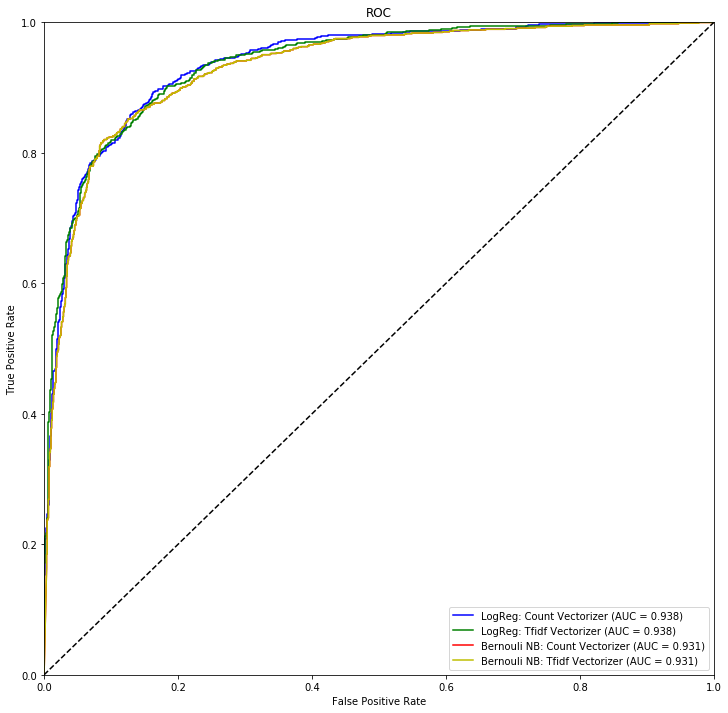

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12


plt.plot(countvec_LR_fpr, countvec_LR_tpr, color = 'b', label = "LogReg: Count Vectorizer" + ' (AUC = %0.3f)' % countvec_LR_auc)
plt.plot(Tfidf_LR_fpr, Tfidf_LR_tpr, color = 'g', label = "LogReg: Tfidf Vectorizer" + ' (AUC = %0.3f)' % Tfidf_LR_auc)
plt.plot(countvec_NB_fpr, countvec_NB_tpr, color = 'r', label = "Bernouli NB: Count Vectorizer" + ' (AUC = %0.3f)' % countvec_NB_auc)
plt.plot(Tfidf_NB_fpr, Tfidf_NB_tpr, color = 'y', label = "Bernouli NB: Tfidf Vectorizer" + ' (AUC = %0.3f)' % Tfidf_NB_auc)


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")


You can't pass strings to a model's fit() method. As mentioned in the scikit-learn documentation: "The training input samples. Internally, it will be converted to dtype=np.float32 and if a sparse matrix is provided to a sparse csc_matrix." That's why we're using the transformed X_test set.

In [23]:
from sklearn.metrics import accuracy_score

y_predict_LR_count = countvec_LR_model.predict(X_test_binary)
y_predict_LR_Tfidf = Tfidf_LR_model.predict(X_test_binary_Tfidf)
y_predict_NB_count = countvec_NB_model.predict(X_test_binary)
y_predict_NB_Tfidf = Tfidf_NB_model.predict(X_test_binary_Tfidf)

print("LogReg: Count Vectorizer - Accuracy: " + str(accuracy_score(Y_test, y_predict_LR_count)) )
print("Winner!! ** LogReg: Tfidf Vectorizer - Accuracy: " + str(accuracy_score(Y_test, y_predict_LR_Tfidf)) )
print("Bernouli NB: Count Vectorizer - Accuracy: " + str(accuracy_score(Y_test, y_predict_NB_count)) )
print("Bernouli NB: Tfidf Vectorizer - Accuracy: " + str(accuracy_score(Y_test, y_predict_NB_Tfidf)) )

LogReg: Count Vectorizer - Accuracy: 0.8607058823529412
Winner!! ** LogReg: Tfidf Vectorizer - Accuracy: 0.8574117647058823
Bernouli NB: Count Vectorizer - Accuracy: 0.864
Bernouli NB: Tfidf Vectorizer - Accuracy: 0.864


Also, below is a 10-fold cross validation procedure used to evaluate each algorithm with summarized results. Cross Validation gives more realistic measure of accuracy.

In [24]:
from sklearn import model_selection

binary_models = []
Tfidf_models= []
binary_models.append(('LogReg: Count Vectorizer', countvec_LR_model))
Tfidf_models.append(('LogReg: Tfidf Vectorizer', Tfidf_LR_model))
binary_models.append(('Bernouli NB: Count Vectorizer', countvec_NB_model))
Tfidf_models.append(('Bernouli NB: Tfidf Vectorizer', Tfidf_NB_model))

results = []
names = []
    
for name, model in binary_models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = model_selection.cross_val_score(model, X_test_binary, Y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
for name, model in Tfidf_models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = model_selection.cross_val_score(model, X_test_binary_Tfidf, Y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogReg: Count Vectorizer: 0.826831 (0.026255)
Bernouli NB: Count Vectorizer: 0.714840 (0.069079)
LogReg: Tfidf Vectorizer: 0.829146 (0.035515)
Bernouli NB: Tfidf Vectorizer: 0.714840 (0.069079)


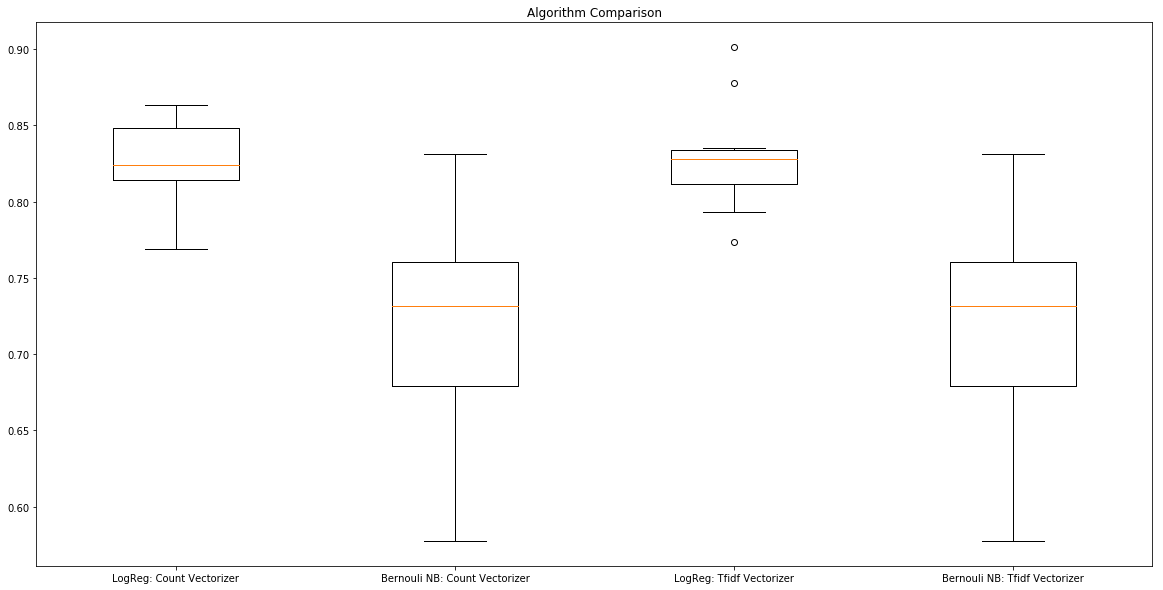

In [25]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,10))
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The Logistic Regression with Tfidf vectorizer consistently performs the best. It has the highest AUC and in a 10-fold cross validation and it has the highest mean accuracy and lowest standard deviation accuracy which means it's performance is high without an extreme varying degree. This may be because Tfidf emphasizes rare words in addition to the count of the words. Accuracy may be misleading because it makes no distinction between false positive and false negative errors, however it is a simple and straight forward measure that I believe is appropriate here.  

The Bernoulli Count vectorizer and the Tfidf vectorizer perform identically. They have the same spread and AUC. This may be because BernoulliNB assumes each data feature to be a binary-valued variable. It also explicitly penalizes the non-occurrence of a feature that is an indicator for class.

We would probably have more success with a Multinomial model that ignores a non-occurring feature and counts how often an event occurred instead of only describes whether or not an event occurred.

Let's use the The Logistic Regression with Tfidf vectorizer to predict the rating of the test data. 

Below are 5 examples that were labeled positive, but were incorrectly classified as negative. We try to hypothesize where the algorithm incorrectly learned. 

In [27]:
a = Tfidf_LR_model.predict(X_test_binary_Tfidf)
X_test.size == Y_test.size == a.size

True

In [79]:
results = pd.DataFrame({'X_test':X_test.values, 'Y_test':Y_test.values, 'Predicted':Tfidf_LR_model.predict(X_test_binary_Tfidf)})

wrong_results = results[results['Y_test'] != results['Predicted'] ]

#Reminder: 1 is positive, 0 is negative. False positives are originally labeled as 1 but predicted to be 0. 
fp = wrong_results[wrong_results['Y_test'] == 1]
fp

,X_test,Y_test,Predicted
13,'Didnt Mystic Pizza win the Oscar for that yea...,1,0
25,'This is a weird movie about an archaeologist ...,1,0
44,'In the hands of a more skilled director this ...,1,0
62,'Kurosawa fresh into color losses sight of his...,1,0
87,'I just cant believe that these games can get ...,1,0
...,...,...,...
2085,'Its all about Mitzi. I loved her in this. And...,1,0
2088,'Ive just watch 2 films of Pang brothers The E...,1,0
2094,'As a fan of looking further into the phenomen...,1,0
2118,'If youve ever wondered why they dont make por...,1,0


In [92]:
fp.sample()

,X_test,Y_test,Predicted
455,'Well this film is a difficult one really. To ...,1,0


In [84]:
X_test.iloc[222]

"'Caught this film in about 1990 on video by chance and without knowing what i was in for. Many horror fans may have missed this thinking it was a typical prison film and the ones who did get it didnt like it as it was not what they wanted to see. The above mentioned factors are probably the reasons it is low rated but just ignore that and give it a whirl if youre a fan of the genre. It has strong suits in all departments from script and atmosphere to acting and the prison itself.  An absolute diamond a film i still have on video to this day. Check it out.'"

This review is considered positive but contains lots of negative words like "low rated" and "didn't like" which the ngram probably picked up on. 

In [86]:
X_test.iloc[1549]

"'I went to this movie expecting an artsy scary film. What I got was scare after scare. Its a horror film at its core. Its not dull like other horror films where a haunted house just has ghosts and gore. This film doesnt even show you the majority of the deaths it shows the fear of the characters. I think one of the best things about the concept where its not just the house thats haunted its whoever goes into the house. They become haunted no matter where they are. Office buildings police stations hotel rooms... etc. After reading some of the external reviews I am really surprised that critics didnt like this film. I am going to see it again this week and am excited about it. I gave this film 10 stars because it did what a horror film should. It scared the s**t out of me.'"

Interestingly, this is also a horror film review. This horror films are in general gory and negative, the algorithm might be misinterpreting this as a negative review when in fact it is what the reader is looking for.

In [88]:
X_test.iloc[2121]

"'People call this a comedy but when I just watched it I laughed only once. I guess the problem is that I first saw it when I was 14 and I wasnt old enough to understand that it wasnt meant to be taken seriously. There were quite a few scenes that were meant to be funny but I cared too much about the characters to laugh at them. I suggest that you watch this film next time youre falling in love and try to take it seriously. I think youll find that despite a few silly flaws its one of the most moving love stories youve ever seen.'"

This review is interesting because it starts off negative and then becomes positive. It might be that more of the words pertain to the writer's negative outlook of the movie in the past as opposed to their present view so the model classified it was negative.

In [90]:
X_test.iloc[1159]

"'This movies origins are a mystery to me as I only know as much as IMDB did before I rented it. I assume that before Starship Troopers Killshot was one of the countless unaired pilots that never made it to network cable or otherwise. The new title of Kill Shot is comically thrown into the opening sequence the first of many quick clues that this was not ever intended for the cinema. The quick cuts cheesy Melrose Place music and short 2-second close-up candid shots of the main actors let you know what youre in for. And I dont mind at all. I rented this movie seeing the repackaging that puts Casper Van Dien and Denise Richards on the cover in front of a volleyball net thinking it would be funny to see them in a movie besides the SciFi travesty of Starship Troopers (an excellent book in my opinion not so hot a movie - but thats another review). After looking it up on IMDB my roommate and I surmised that the pilot was dragged up after the apparent success of Troopers and Richards own caree

This viewer is very indifferent about the movie. It sounds like they watched it because they had nothing better to do. Because of this, the language they use is also very dry and unenthusiastic. The model probably translated this as negative. 

In [93]:
X_test.iloc[455]

"'Well this film is a difficult one really. To be straight with you this film doesnt contain much of a riveting story nore does it make u want to know how itll end...but Ill tell you something now...never have I been as tense and jumped up before in my life! This film sure does deliver the jumps and thrills! To be fair I did watch it at almost midnight so I was kinda sleepy anyway so maybe that explains why I was jumpy...or maybe its because this film does deliver in that aspect! Its basically about a couple who lose their child in a tragic event. They decide to move away and rent a cabin looking thing in the mountains...all looks peaceful and calm until they have their first visitors (i think its its the sister of the main character and she brings along her husband)...during the night the husband hears noises...checks it out and thats when things start to go really really wrong...they dont stay for another day and tell the couple they should leave asap as something isnt right...to cut

This is another review for a horror film and the reviewer is suggesting to maybe watch it. Again, we see the indifferent attitude. A combination of the two tones and horror language probably suggested to the model that it was a negative review. 